# Can AI reduce undertriage while maintaining calibration and fairness across demographic groups?

In [2]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df_chief = pd.read_csv(r'data\chief_complaints.csv')
df_patient = pd.read_csv(r'data\patient_history.csv')
df_test = pd.read_csv(r'data\test.csv')
df_train = pd.read_csv(r'data\train.csv')


FileNotFoundError: [Errno 2] No such file or directory: 'data\\chief_complaints.csv'

In [3]:
df_patient.head(2)

,patient_id,hx_hypertension,hx_diabetes_type2,hx_diabetes_type1,hx_asthma,hx_copd,hx_heart_failure,hx_atrial_fibrillation,hx_ckd,hx_liver_disease,...,hx_hypothyroidism,hx_hyperthyroidism,hx_hiv,hx_coagulopathy,hx_immunosuppressed,hx_pregnant,hx_substance_use_disorder,hx_coronary_artery_disease,hx_stroke_prior,hx_peripheral_vascular_disease
0,TG-UXRGA9UCO,1,0,0,0,0,1,0,0,0,...,1,1,0,0,1,0,0,0,0,0
1,TG-B19DBBS2G,0,0,0,1,0,1,0,0,1,...,1,0,0,0,1,0,1,1,0,0


In [4]:
df_chief.head(2)

,patient_id,chief_complaint_raw,chief_complaint_system
0,TG-UXRGA9UCO,"thunderclap headache, worsening with movement",neurological
1,TG-B19DBBS2G,"contraception advice, intermittent",genitourinary


In [5]:
df_chief.columns

Index(['patient_id', 'chief_complaint_raw', 'chief_complaint_system'], dtype='object')

In [6]:
df_patient.columns

Index(['patient_id', 'hx_hypertension', 'hx_diabetes_type2',
       'hx_diabetes_type1', 'hx_asthma', 'hx_copd', 'hx_heart_failure',
       'hx_atrial_fibrillation', 'hx_ckd', 'hx_liver_disease', 'hx_malignancy',
       'hx_obesity', 'hx_depression', 'hx_anxiety', 'hx_dementia',
       'hx_epilepsy', 'hx_hypothyroidism', 'hx_hyperthyroidism', 'hx_hiv',
       'hx_coagulopathy', 'hx_immunosuppressed', 'hx_pregnant',
       'hx_substance_use_disorder', 'hx_coronary_artery_disease',
       'hx_stroke_prior', 'hx_peripheral_vascular_disease'],
      dtype='object')

In [7]:
pd.set_option('display.max_columns', None)
df_train.columns

Index(['patient_id', 'site_id', 'triage_nurse_id', 'arrival_mode',
       'arrival_hour', 'arrival_day', 'arrival_month', 'arrival_season',
       'shift', 'age', 'age_group', 'sex', 'language', 'insurance_type',
       'transport_origin', 'pain_location', 'mental_status_triage',
       'chief_complaint_system', 'num_prior_ed_visits_12m',
       'num_prior_admissions_12m', 'num_active_medications',
       'num_comorbidities', 'systolic_bp', 'diastolic_bp',
       'mean_arterial_pressure', 'pulse_pressure', 'heart_rate',
       'respiratory_rate', 'temperature_c', 'spo2', 'gcs_total', 'pain_score',
       'weight_kg', 'height_cm', 'bmi', 'shock_index', 'news2_score',
       'disposition', 'ed_los_hours', 'triage_acuity'],
      dtype='object')

In [8]:
df_test.columns

Index(['patient_id', 'site_id', 'triage_nurse_id', 'arrival_mode',
       'arrival_hour', 'arrival_day', 'arrival_month', 'arrival_season',
       'shift', 'age', 'age_group', 'sex', 'language', 'insurance_type',
       'transport_origin', 'pain_location', 'mental_status_triage',
       'chief_complaint_system', 'num_prior_ed_visits_12m',
       'num_prior_admissions_12m', 'num_active_medications',
       'num_comorbidities', 'systolic_bp', 'diastolic_bp',
       'mean_arterial_pressure', 'pulse_pressure', 'heart_rate',
       'respiratory_rate', 'temperature_c', 'spo2', 'gcs_total', 'pain_score',
       'weight_kg', 'height_cm', 'bmi', 'shock_index', 'news2_score'],
      dtype='object')

# EXPLORING Train DataSet

In [9]:
df_train_info = pd.DataFrame({
    "Column": df_train.columns,
    "Non-Null Count": df_train.notnull().sum().values,
    "Dtype": df_train.dtypes.values
})

df_train_info

,Column,Non-Null Count,Dtype
0,patient_id,80000,object
1,site_id,80000,object
2,triage_nurse_id,80000,object
3,arrival_mode,80000,object
4,arrival_hour,80000,int64
5,arrival_day,80000,object
6,arrival_month,80000,int64
7,arrival_season,80000,object
8,shift,80000,object
9,age,80000,int64


**systolic_bp → 80000 - 75854 = 4146 missing (~5.18%)**

diastolic_bp → same (~5.18%)

mean_arterial_pressure → same (~5.18%)

pulse_pressure → same (~5.18%)

shock_index → same (~5.18%)

respiratory_rate → 80000 - 76933 = 3067 (~3.8%)

temperature_c → 574 (~0.7%)

All BP-related features missing together.

In [10]:
df_train.sample(1)

,patient_id,site_id,triage_nurse_id,arrival_mode,arrival_hour,arrival_day,arrival_month,arrival_season,shift,age,age_group,sex,language,insurance_type,transport_origin,pain_location,mental_status_triage,chief_complaint_system,num_prior_ed_visits_12m,num_prior_admissions_12m,num_active_medications,num_comorbidities,systolic_bp,diastolic_bp,mean_arterial_pressure,pulse_pressure,heart_rate,respiratory_rate,temperature_c,spo2,gcs_total,pain_score,weight_kg,height_cm,bmi,shock_index,news2_score,disposition,ed_los_hours,triage_acuity
25965,TG-GR3TDID76,SITE-TMP-01,NURSE-0026,transfer,14,Monday,6,summer,afternoon,26,young_adult,F,Finnish,private,other_hospital,back,alert,musculoskeletal,1,0,2,2,153.4,92.4,112.7,61.0,91.9,15.9,38.0,98.4,15,6,68.9,181.5,20.9,0.599,1,transferred,2.99,3


In [11]:
# Drop for Modeling
# Why drop?

# patient_id → meaningless

# site_id → hospital bias risk

# triage_nurse_id → label leakage / bias learning

identifiers = [
    "patient_id",
    "site_id",
    "triage_nurse_id"
]


# Continuous Clinical Variables
continuous_train = [
    "systolic_bp",
    "diastolic_bp",
    "mean_arterial_pressure",
    "pulse_pressure",
    "heart_rate",
    "respiratory_rate",
    "temperature_c",
    "spo2",
    "weight_kg",
    "height_cm",
    "bmi",
    "shock_index",
    "news2_score",
    "ed_los_hours"  # Emergency Department Length of Stay Only for analysis, not modeling  If you use ed_los_hours in training,
                    # Model will learn:
                    # Long stay → high acuity
                    # But at triage time,
                    # Doctor does NOT know how long patient will stay.
                    # That means:
                    # You are leaking future information into the model.
]






# Discrete Clinical Scores (Ordered Integers)
ordinal_features_train = [
    "gcs_total",       # 3–15
    "pain_score",      # 0–10
    "triage_acuity"    # TARGET (1–5)
]



# Count-Based Features (Integer Counts)
count_features_train = [
    "num_prior_ed_visits_12m",
    "num_prior_admissions_12m",
    "num_active_medications",
    "num_comorbidities"
]




# Categorical Features (Nominal)
categorical_train = [
    "arrival_mode",
    "arrival_day",
    # "arrival_month",   # could treat as cyclic
    "arrival_season",
    "shift",
    "age_group",
    "sex",
    "language",
    "insurance_type",
    "transport_origin",
    "pain_location",
    "mental_status_triage",
    "chief_complaint_system",
    "disposition"   # disposition = patient final outcome after ED visit. Drop during training
]






# Time-Based Features
time_features_train = [
    "arrival_hour",
    "arrival_month"    # We may convert to sin/cos    encoding later.
]









In [12]:
df_train[continuous_train].describe()

,systolic_bp,diastolic_bp,mean_arterial_pressure,pulse_pressure,heart_rate,respiratory_rate,temperature_c,spo2,weight_kg,height_cm,bmi,shock_index,news2_score,ed_los_hours
count,75854.000000,75854.000000,75854.000000,75854.000000,80000.000000,76933.000000,79426.000000,80000.000000,80000.000000,80000.000000,80000.000000,75854.000000,80000.000000,80000.000000
mean,121.612599,74.452339,90.172434,47.160261,91.858623,18.333857,37.631417,95.793801,74.453355,168.623680,26.359772,0.810019,3.426825,3.498276
std,24.221898,14.285613,14.174033,24.253618,19.488988,4.647342,0.856517,4.306756,21.339829,16.592256,7.666452,0.327007,4.258565,2.443958
min,40.000000,20.000000,30.700000,-51.000000,30.000000,8.000000,35.100000,60.400000,2.000000,45.000000,10.000000,0.190000,0.000000,0.000000
25%,106.200000,65.500000,81.900000,31.100000,78.200000,15.200000,37.000000,94.100000,62.000000,163.400000,21.300000,0.601000,0.000000,1.580000
50%,123.100000,75.300000,91.900000,47.200000,89.600000,17.300000,37.500000,97.000000,76.000000,171.100000,26.000000,0.724000,2.000000,3.000000
75%,138.300000,84.200000,100.000000,63.400000,103.200000,20.300000,38.100000,98.900000,88.800000,178.100000,30.900000,0.920000,5.000000,4.860000
max,226.900000,134.800000,145.100000,163.700000,207.700000,51.500000,41.800000,100.000000,148.500000,210.000000,65.000000,4.768000,17.000000,17.510000


*This must be handled.*<br>
1. pulse_pressure , Min = -51 Pulse pressure = systolic - diastolic it cant be Negative<br>
2 .Weight min = 2 kg That is infant weight. But age
column may include infants? Check age min.



In [13]:
df_train[df_train["pulse_pressure"] < 0].shape

(2087, 40)

2087 patients me pulse_pressure < 0
Total = 80000<br>

= 2.6 % cases<br>

 *Clinically impossible.*<br>

Pulse pressure = systolic - diastolic<br>
Negative Means:<br>
diastolic > systolic<br>
which is physiologically invalid.<br>

**We will:**
Recompute pulse_pressure:<br>
Approximately 2.6% of pulse pressure values were physiologically implausible, likely reflecting synthetic variability. These will be corrected using systolic-diastolic recomputation.<br>
**df_train["pulse_pressure_corrected"] = df_train["systolic_bp"] - df_train["diastolic_bp"]**

In [14]:
df_train["age"].describe()

count    80000.000000
mean        48.544225
std         24.187528
min          1.000000
25%         29.000000
50%         48.000000
75%         67.000000
max         94.000000
Name: age, dtype: float64

In [15]:
df_train[df_train["weight_kg"] < 5]

,patient_id,site_id,triage_nurse_id,arrival_mode,arrival_hour,arrival_day,arrival_month,arrival_season,shift,age,age_group,sex,language,insurance_type,transport_origin,pain_location,mental_status_triage,chief_complaint_system,num_prior_ed_visits_12m,num_prior_admissions_12m,num_active_medications,num_comorbidities,systolic_bp,diastolic_bp,mean_arterial_pressure,pulse_pressure,heart_rate,respiratory_rate,temperature_c,spo2,gcs_total,pain_score,weight_kg,height_cm,bmi,shock_index,news2_score,disposition,ed_los_hours,triage_acuity
23,TG-XB4N9LMEE,SITE-HEL-02,NURSE-0011,walk-in,19,Friday,2,winter,afternoon,11,pediatric,M,Finnish,public,other_hospital,back,confused,gastrointestinal,4,1,0,4,79.8,46.8,57.8,33.0,114.0,15.8,38.5,82.8,9,5,4.9,134.1,10.0,1.429,12,admitted,7.05,2
773,TG-S21PBZFKH,SITE-HEL-01,NURSE-0004,walk-in,8,Thursday,4,spring,morning,3,pediatric,M,Finnish,private,nursing_home,chest,unresponsive,respiratory,0,0,0,0,92.3,88.6,89.8,3.7,89.0,15.9,38.3,84.3,15,6,2.0,128.8,10.0,0.964,6,observation,10.65,2
899,TG-UGOOU2SQT,SITE-TUR-01,NURSE-0050,ambulance,3,Monday,4,spring,night,14,pediatric,F,Finnish,private,other_hospital,pelvis,unresponsive,ophthalmic,2,1,2,4,107.1,44.7,65.5,62.4,50.0,15.1,39.8,92.5,12,5,4.1,157.5,10.0,0.467,9,admitted,4.33,2
1052,TG-1H2NJ8IFP,SITE-HEL-02,NURSE-0003,ambulance,12,Saturday,8,summer,morning,5,pediatric,M,Finnish,public,public_space,chest,alert,other,0,0,2,2,136.9,67.0,90.3,69.9,86.3,17.7,37.8,97.6,15,7,2.0,154.9,10.0,0.630,0,admitted,2.96,3
1117,TG-Q6VXXHO91,SITE-OUL-01,NURSE-0012,walk-in,6,Friday,1,winter,morning,4,pediatric,F,Swedish,none,home,pelvis,confused,gastrointestinal,2,0,3,5,101.6,80.5,87.5,21.1,100.9,21.9,38.9,89.2,13,9,2.0,129.5,10.0,0.993,11,admitted,9.03,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74928,TG-7UB4O5EYR,SITE-OUL-01,NURSE-0027,ambulance,12,Saturday,8,summer,morning,8,pediatric,F,Finnish,public,other_hospital,head,confused,trauma,0,0,2,2,139.5,55.0,83.2,84.5,75.4,17.4,37.3,94.3,15,7,2.4,119.6,10.0,0.541,1,admitted,2.90,3
76179,TG-ZYFN7TMVF,SITE-TUR-01,NURSE-0009,ambulance,7,Wednesday,6,summer,morning,11,pediatric,F,Finnish,none,home,unknown,alert,trauma,5,2,3,2,94.4,59.4,71.1,35.0,152.0,21.0,37.9,96.1,11,6,2.0,138.0,10.0,1.610,10,lama,7.71,2
77712,TG-O204ZT4ZR,SITE-TUR-01,NURSE-0035,walk-in,0,Friday,8,summer,night,15,pediatric,M,Finnish,private,other_hospital,head,alert,endocrine,1,1,0,0,134.0,66.0,88.7,68.0,65.5,19.6,37.9,97.4,15,8,2.5,153.1,10.0,0.489,0,discharged,6.94,3
79259,TG-3WSBURI27,SITE-HEL-02,NURSE-0036,brought_by_family,17,Sunday,12,winter,afternoon,1,pediatric,F,Finnish,private,nursing_home,back,drowsy,dermatological,5,3,1,2,128.4,54.6,79.2,73.8,77.6,13.3,38.8,87.4,12,7,2.0,89.7,10.0,0.604,7,discharged,5.76,2


In [16]:
df_train[df_train["age"] < 18]["bmi"].describe()

count    8562.000000
mean       24.209250
std        12.072102
min        10.000000
25%        15.125000
50%        22.200000
75%        30.200000
max        65.000000
Name: bmi, dtype: float64

In [17]:
df_train.groupby(df_train["age"] < 18)[
    ["heart_rate", "respiratory_rate", "spo2"]
].mean()

,heart_rate,respiratory_rate,spo2
age,,,
False,91.969617,18.325918,95.793149
True,90.932527,18.400158,95.799241


In [18]:
df_train.groupby("triage_acuity")[
    ["heart_rate", "respiratory_rate", "spo2", "shock_index", "news2_score"]
].mean()

,heart_rate,respiratory_rate,spo2,shock_index,news2_score
triage_acuity,,,,,
1,119.291248,27.954655,85.862570,1.530057,13.637492
2,108.707977,22.966917,91.880966,1.132188,10.073294
3,93.015812,17.991169,95.873483,0.761835,2.606376
4,84.089639,15.995202,97.820226,0.648687,0.672546
5,76.991849,15.029112,98.919810,0.611647,0.348307


In [19]:
df_train.groupby("triage_acuity")["news2_score"].describe()

,count,mean,std,min,25%,50%,75%,max
triage_acuity,,,,,,,,
1,3222.0,13.637492,2.044718,6.0,12.0,14.0,15.0,17.0
2,13439.0,10.073294,2.673407,0.0,8.0,10.0,12.0,17.0
3,28921.0,2.606376,1.745187,0.0,1.0,2.0,4.0,11.0
4,23020.0,0.672546,0.848015,0.0,0.0,0.0,1.0,7.0
5,11398.0,0.348307,0.659248,0.0,0.0,0.0,1.0,4.0


In [20]:
df_train["shock_index"].quantile([0.95, 0.99])


0.95    1.44900
0.99    2.00647
Name: shock_index, dtype: float64

# count_features_train

In [21]:
df_train[count_features_train].describe()

,num_prior_ed_visits_12m,num_prior_admissions_12m,num_active_medications,num_comorbidities
count,80000.000000,80000.000000,80000.000000,80000.000000
mean,1.378162,0.414700,4.791425,5.348838
std,1.429609,0.773535,3.858404,3.187295
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2.000000,3.000000
50%,1.000000,0.000000,4.000000,5.000000
75%,2.000000,1.000000,7.000000,8.000000
max,11.000000,9.000000,20.000000,20.000000


In [22]:
df_train.groupby("triage_acuity")[[
    "num_prior_ed_visits_12m",
    "num_prior_admissions_12m",
    "num_active_medications",
    "num_comorbidities"
]].mean()

,num_prior_ed_visits_12m,num_prior_admissions_12m,num_active_medications,num_comorbidities
triage_acuity,,,,
1,3.539727,1.063625,5.778088,6.617318
2,2.515663,0.751321,5.701391,6.475854
3,1.496145,0.450745,4.559835,5.052419
4,0.794266,0.241312,4.541182,5.047176
5,0.305843,0.093087,4.532637,5.022811


**Observation 1 — Very Strong Signal**<br>
Prior ED visits decreases cleanly from ESI 1 → 5<br>
Prior admissions decreases cleanly<br>
Comorbidities decreases (but flattens at 3–5)<br>
Active meds slightly decreases but weak signal at lower levels<br>
This is clinically realistic<br>

**What This Means**
ESI 1–2 patients are:<br>
More complex<br>
More fragile<br>
More hospital-experienced<br>
Chronic disease heavy<br>
That’s exactly how ED works.<br>

# categorical_train

In [23]:
df_train[categorical_train].describe()


,arrival_mode,arrival_day,arrival_season,shift,age_group,sex,language,insurance_type,transport_origin,pain_location,mental_status_triage,chief_complaint_system,disposition
count,80000,80000,80000,80000,80000,80000,80000,80000,80000,80000,80000,80000,80000
unique,6,7,4,4,4,3,8,5,7,9,5,14,7
top,walk-in,Monday,autumn,morning,middle_aged,F,Finnish,public,school,pelvis,alert,gastrointestinal,discharged
freq,38459,11539,20054,26681,27889,40339,44134,48170,11571,8998,46212,5812,39028


In [24]:
# mental_status_triage vs ESI
pd.crosstab(df_train["mental_status_triage"],
            df_train["triage_acuity"],
            normalize="index")

triage_acuity,1,2,3,4,5
mental_status_triage,,,,,
agitated,0.055283,0.344548,0.391716,0.189011,0.019442
alert,0.000844,0.029603,0.342205,0.398511,0.228837
confused,0.010568,0.278606,0.515641,0.162013,0.033172
drowsy,0.087243,0.445336,0.313043,0.128667,0.025711
unresponsive,0.426277,0.445907,0.127816,0.000000,0.000000


mental_status_triage vs ESI Dataset is:

 Clinically coherent<br>
 Logically structured<br>
 Strong signal alignment

In [25]:
# arrival_mode vs ESI
pd.crosstab(df_train["arrival_mode"],
            df_train["triage_acuity"],
            normalize="index")

triage_acuity,1,2,3,4,5
arrival_mode,,,,,
ambulance,0.040573,0.167470,0.359802,0.289323,0.142832
brought_by_family,0.042629,0.169264,0.359126,0.282823,0.146158
helicopter,0.046985,0.153015,0.375468,0.283160,0.141372
police,0.039216,0.170778,0.358950,0.282416,0.148640
transfer,0.039314,0.161638,0.363591,0.291348,0.144109
walk-in,0.039627,0.170129,0.361762,0.287527,0.140955


**Arrival Mode vs ESI — What We Expected**<br>
Clinically:<br>
Ambulance → more ESI 1–2<br>
Helicopter → very high acuity<br>

Walk-in → mostly ESI 3–5<br>
But your table shows:<br>
All arrival modes have almost identical distribution.<br>

Example:<br>
Walk-in:<br>
3.9% ESI 1<br>
17% ESI 2<br>
36% ESI 3<br>
28% ESI 4<br>
14% ESI 5<br>

Ambulance:<br>
4.0% ESI 1<br>
16.7% ESI 2<br>
35.9% ESI 3<br>
28.9% ESI 4<br>
14.2% ESI 5<br>
**Almost identical.**<br>

***This means:***<br>
arrival_mode does NOT influence acuity strongly in this synthetic dataset.

In [26]:
# language vs ESI
pd.crosstab(df_train["language"],
            df_train["triage_acuity"],
            normalize="index")

triage_acuity,1,2,3,4,5
language,,,,,
Arabic,0.041329,0.171146,0.358266,0.279665,0.149594
English,0.043245,0.167996,0.355434,0.293993,0.139332
Estonian,0.041581,0.177851,0.352408,0.282215,0.145945
Finnish,0.040173,0.167195,0.361694,0.287488,0.143449
Other,0.041583,0.165827,0.367440,0.288810,0.136341
Russian,0.039377,0.167353,0.363164,0.285842,0.144263
Somali,0.037224,0.174132,0.357413,0.302208,0.129022
Swedish,0.037055,0.162787,0.373872,0.284719,0.141568


Across all languages:<br>
Distribution is almost identical.

In [27]:
# time_features_train
df_train[time_features_train].describe()

,arrival_hour,arrival_month
count,80000.000000,80000.000000
mean,11.430600,6.507413
std,6.923497,3.457444
min,0.000000,1.000000
25%,5.000000,3.000000
50%,11.000000,7.000000
75%,17.000000,10.000000
max,23.000000,12.000000


In [28]:
df_train["triage_acuity"].value_counts(normalize=True)

triage_acuity
3    0.361513
4    0.287750
2    0.167988
5    0.142475
1    0.040275
Name: proportion, dtype: float64

In [29]:
df_train_null = pd.DataFrame({
    "Null Count %": df_train.isnull().sum()/len(df_train)*100
})

df_train_null


,Null Count %
patient_id,0.00000
site_id,0.00000
triage_nurse_id,0.00000
arrival_mode,0.00000
arrival_hour,0.00000
arrival_day,0.00000
arrival_month,0.00000
arrival_season,0.00000
shift,0.00000
age,0.00000


# checking Skewness

In [30]:
df_train[continuous_train].skew()

systolic_bp              -0.270069
diastolic_bp             -0.313152
mean_arterial_pressure   -0.533622
pulse_pressure           -0.014743
heart_rate                0.665693
respiratory_rate          1.345961
temperature_c             0.680302
spo2                     -1.844762
weight_kg                -0.408396
height_cm                -2.109110
bmi                       0.573827
shock_index               2.175329
news2_score               1.380001
ed_los_hours              1.084918
dtype: float64

array([[<Axes: title={'center': 'systolic_bp'}>,
        <Axes: title={'center': 'diastolic_bp'}>,
        <Axes: title={'center': 'mean_arterial_pressure'}>,
        <Axes: title={'center': 'pulse_pressure'}>],
       [<Axes: title={'center': 'heart_rate'}>,
        <Axes: title={'center': 'respiratory_rate'}>,
        <Axes: title={'center': 'temperature_c'}>,
        <Axes: title={'center': 'spo2'}>],
       [<Axes: title={'center': 'weight_kg'}>,
        <Axes: title={'center': 'height_cm'}>,
        <Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'shock_index'}>],
       [<Axes: title={'center': 'news2_score'}>,
        <Axes: title={'center': 'ed_los_hours'}>, <Axes: >, <Axes: >]],
      dtype=object)

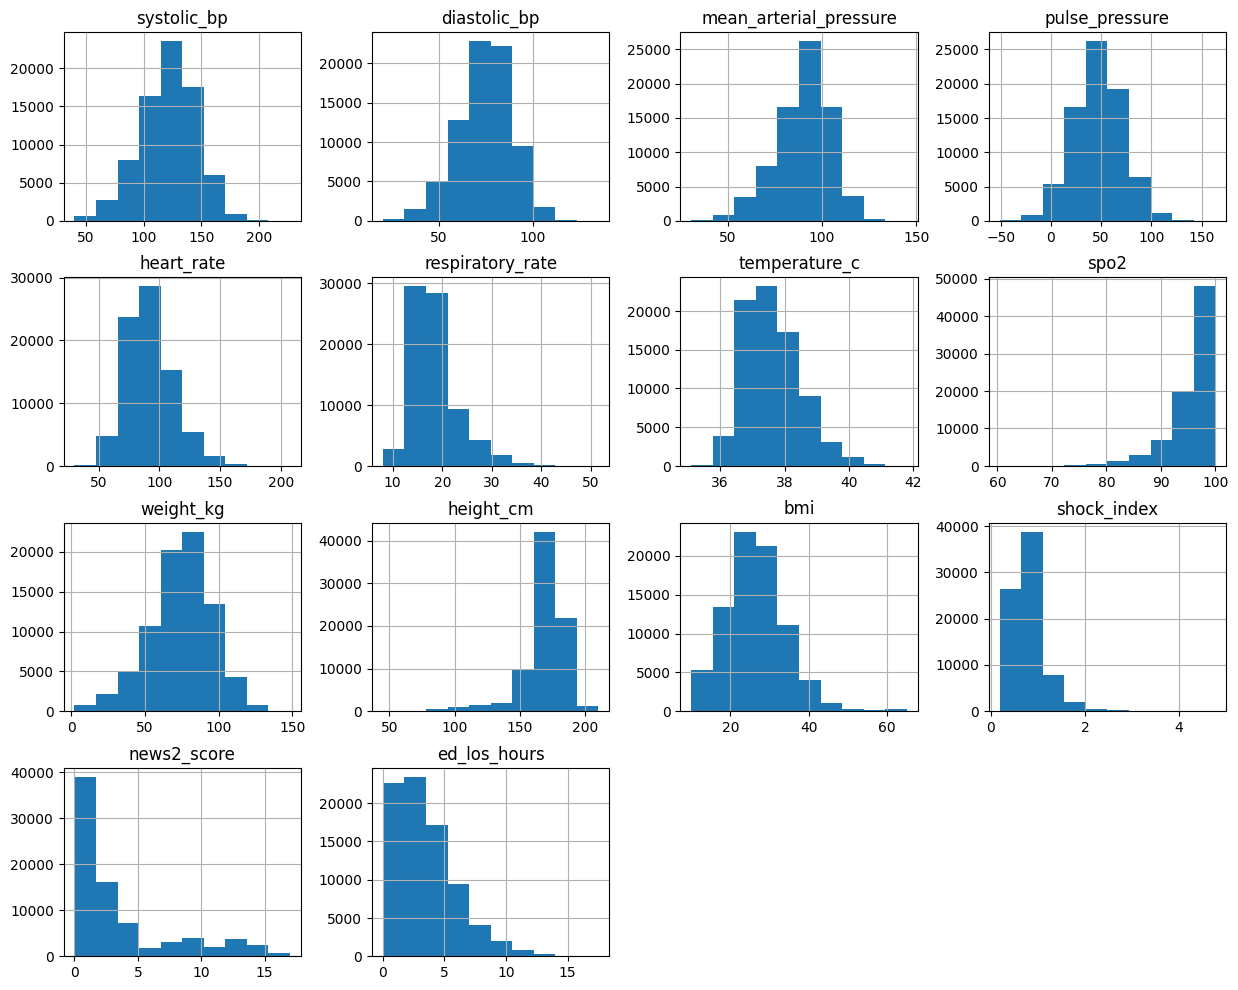

In [31]:
df_train[continuous_train].hist(figsize=(15,12))